In [1]:
!pwd
!which python
!hostname

/media/ebeyerle/seagate/af2-dynamics/notebooks


/home/ebeyerle/micromamba/envs/bioemu-env/bin/python
hemingway


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
#import MDAnalysis as mda
import deeptime
from scipy.interpolate import RegularGridInterpolator

In [3]:
def traj_from_xtc(XTC, TOP, chunk_size = 10000):
	lst = []
	for chunk in md.iterload(XTC, chunk = chunk_size, top = TOP):
		print(chunk)
		lst.append(chunk)

	for i, dummy in enumerate(lst):
		print(dummy)
		NFRS = dummy.n_frames
		NATOMS = dummy.n_atoms
		if i == 0:
			traj =  np.reshape(dummy.xyz, (NFRS, 3*NATOMS))
		else:
			traj = np.vstack([traj, np.reshape(dummy.xyz, (NFRS, 3*NATOMS))])

	return traj #, md.join(lst)

def xyz_from_xtc(XTC, TOP, chunk_size = 10000):
	lst = []
	for chunk in md.iterload(XTC, chunk = chunk_size, top = TOP):
		print(chunk)
		lst.append(chunk)

	for i, dummy in enumerate(lst):
		print(dummy)
		NFRS = dummy.n_frames
		NATOMS = dummy.n_atoms
		if i == 0:
			traj =  dummy.xyz
		else:
			traj = np.vstack([traj, dummy.xyz])

	return traj #, md.join(lst)

def traj_from_dcd(DCD, TOP, chunk_size = 10000):
	lst = []
	for chunk in md.iterload(DCD, chunk = chunk_size, top = TOP):
		print(chunk)
		lst.append(chunk)

	for i, dummy in enumerate(lst):
		print(dummy)
		NFRS = dummy.n_frames
		NATOMS = dummy.n_atoms
		if i == 0:
			traj =  np.reshape(dummy.xyz, (NFRS, 3*NATOMS))
		else:
			traj = np.vstack([traj, np.reshape(dummy.xyz, (NFRS, 3*NATOMS))])

	return traj


def traj_from_pdb(PDB, TOP, chunk_size = 10000):
	lst = []
	for chunk in md.iterload(PDB, chunk = chunk_size, top = TOP):
		print(chunk)
		lst.append(chunk)

	for i, dummy in enumerate(lst):
		print(dummy)
		NFRS = dummy.n_frames
		NATOMS = dummy.n_atoms
		if i == 0:
			traj =  np.reshape(dummy.xyz, (NFRS, 3*NATOMS))
		else:
			traj = np.vstack([traj, np.reshape(dummy.xyz, (NFRS, 3*NATOMS))])

	return traj

def ca_traj_from_xtc(XTC, TOP, chunk_size = 10000):
	lst = []
	for chunk in md.iterload(XTC, chunk = chunk_size, top = TOP):
		print(chunk)
		lst.append(chunk)

	for i, dummy in enumerate(lst):
		print(dummy)
		NFRS = dummy.n_frames
		NATOMS = dummy.n_atoms
		if i == 0:
			traj =  np.reshape(dummy.xyz, (NFRS, 3*NATOMS))
		else:
			traj = np.vstack([traj, np.reshape(dummy.xyz, (NFRS, 3*NATOMS))])

	return traj #, md.join(lst)

In [4]:
params = {'legend.fontsize': 25,
          'figure.figsize': (8, 6),
         'axes.labelsize': 30,
         'axes.titlesize':25,
         'xtick.labelsize':25,'ytick.labelsize':25,
         'axes.linewidth':4,
         'xtick.major.width':3,'ytick.major.width':3,
         'xtick.minor.width':1,'ytick.minor.width':1,
         'xtick.major.size':5,'ytick.major.size':5,
         'xtick.minor.size':3,'ytick.minor.size':3,
         'xtick.direction':'in','ytick.direction':'in'
         }
plt.rcParams.update(params)

In [5]:
model_list = []
mean_list = []
xbins_list = []
ybins_list = []
fes_list = []

In [6]:
modes_to_save = [0, 1, 2, 3, 4, 5, 114, 260]

<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5

/tmp/ipykernel_2145021/1108547181.py:32: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(hist)


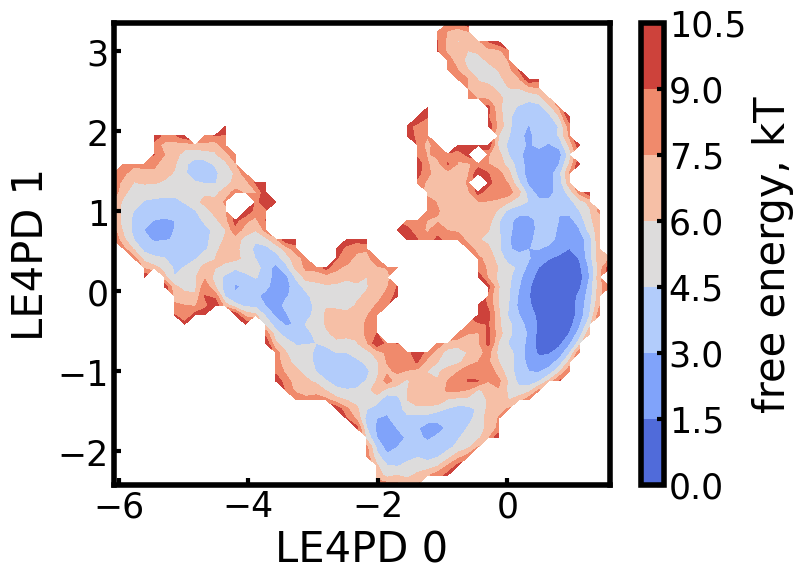

In [7]:
lst = []
for chunk in md.iterload('../sims/openmm/3ttp/CA.xtc', chunk = 5000, top = '../sims/openmm/3ttp/CA.pdb'):
    print(chunk)
    lst.append(chunk)
    
traj = md.join(lst)

del lst, chunk

ref = md.load_pdb('../sims/openmm/3ttp/CA.pdb')

traj.superpose(ref)


sim_mean = traj.xyz.mean(0)
sim_dtraj = (traj.xyz - traj.xyz.mean(0))
sim_dtraj = sim_dtraj.reshape(sim_dtraj.shape[0], sim_dtraj.shape[1] * sim_dtraj.shape[2])


QINV = np.load('../sims/openmm/3ttp/QINVmatrix.npy')

tICs0 = np.matmul(QINV, sim_dtraj.T).T


hist, xbins, ybins = np.histogram2d(tICs0[:,0], tICs0[:,1], bins = 50)
hist = hist / hist.sum()
hist = hist.T

xbins = (xbins[1:] + xbins[:-1]) / 2
ybins = (ybins[1:] + ybins[:-1]) / 2

fes = -np.log(hist)
fes = fes - fes.min()

xx, yy = np.meshgrid(xbins, ybins)

im = plt.contourf(xx, yy, fes, cmap = 'coolwarm')
cbar = plt.colorbar(im)
cbar.set_label('free energy, kT')
plt.xlabel(r'LE4PD 0')
plt.ylabel(r'LE4PD 1')
plt.show()
plt.close()
    
# collect garbage
del sim_dtraj, traj

ttp_tICs = tICs0

mean_list.append(sim_mean)
xbins_list.append(xbins)
ybins_list.append(ybins)
fes_list.append(fes)

QINV_3ttp = QINV

<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5

<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 99 atoms, 99 residues, and unitcells>
<mdtraj.Trajectory with 5

/tmp/ipykernel_2145021/384842714.py:32: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(hist)


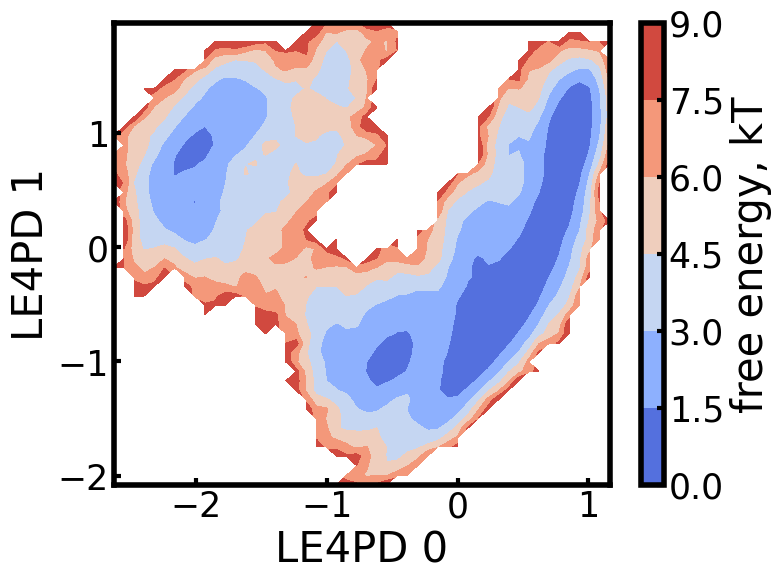

In [8]:
lst = []
for chunk in md.iterload('../sims/openmm/2pc0/CA.xtc', chunk = 5000, top = '../sims/openmm/2pc0/CA.pdb'):
    print(chunk)
    lst.append(chunk)
    
traj = md.join(lst)

del lst, chunk

ref = md.load_pdb('../sims/openmm/2pc0/CA.pdb')

traj.superpose(ref)


sim_mean = traj.xyz.mean(0)
sim_dtraj = (traj.xyz - traj.xyz.mean(0))
sim_dtraj = sim_dtraj.reshape(sim_dtraj.shape[0], sim_dtraj.shape[1] * sim_dtraj.shape[2])


QINV = np.load('../sims/openmm/2pc0/QINVmatrix.npy')

tICs0 = np.matmul(QINV, sim_dtraj.T).T


hist, xbins, ybins = np.histogram2d(tICs0[:,0], tICs0[:,1], bins = 50)
hist = hist / hist.sum()
hist = hist.T

xbins = (xbins[1:] + xbins[:-1]) / 2
ybins = (ybins[1:] + ybins[:-1]) / 2

fes = -np.log(hist)
fes = fes - fes.min()

xx, yy = np.meshgrid(xbins, ybins)

im = plt.contourf(xx, yy, fes, cmap = 'coolwarm')
cbar = plt.colorbar(im)
cbar.set_label('free energy, kT')
plt.xlabel(r'LE4PD 0')
plt.ylabel(r'LE4PD 1')
plt.show()
plt.close()
    
# collect garbage
del sim_dtraj, traj

pc0_tICs = tICs0

mean_list.append(sim_mean)
xbins_list.append(xbins)
ybins_list.append(ybins)
fes_list.append(fes)

QINV_2pc0 = QINV

<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5

<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5000 frames, 95 atoms, 95 residues, and unitcells>
<mdtraj.Trajectory with 5

/tmp/ipykernel_2145021/2141873271.py:32: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(hist)


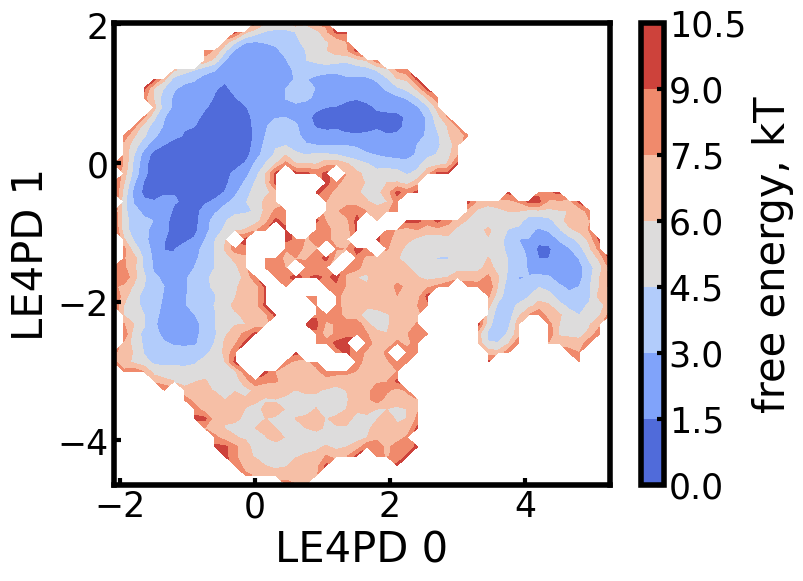

In [9]:
lst = []
for chunk in md.iterload('../sims/openmm/1q9p/CA.xtc', chunk = 5000, top = '../sims/openmm/1q9p/CA.pdb'):
    print(chunk)
    lst.append(chunk)
    
traj = md.join(lst)

del lst, chunk

ref = md.load_pdb('../sims/openmm/1q9p/CA.pdb')

traj.superpose(ref)


sim_mean = traj.xyz.mean(0)
sim_dtraj = (traj.xyz - traj.xyz.mean(0))
sim_dtraj = sim_dtraj.reshape(sim_dtraj.shape[0], sim_dtraj.shape[1] * sim_dtraj.shape[2])


QINV = np.load('../sims/openmm/1q9p/QINVmatrix.npy')

tICs0 = np.matmul(QINV, sim_dtraj.T).T


hist, xbins, ybins = np.histogram2d(tICs0[:,0], tICs0[:,1], bins = 50)
hist = hist / hist.sum()
hist = hist.T

xbins = (xbins[1:] + xbins[:-1]) / 2
ybins = (ybins[1:] + ybins[:-1]) / 2

fes = -np.log(hist)
fes = fes - fes.min()

xx, yy = np.meshgrid(xbins, ybins)

im = plt.contourf(xx, yy, fes, cmap = 'coolwarm')
cbar = plt.colorbar(im)
cbar.set_label('free energy, kT')
plt.xlabel(r'LE4PD 0')
plt.ylabel(r'LE4PD 1')
plt.show()
plt.close()
    
# collect garbage
del sim_dtraj, traj

q9p_tICs = tICs0

mean_list.append(sim_mean)
xbins_list.append(xbins)
ybins_list.append(ybins)
fes_list.append(fes)

QINV_1q9p = QINV

In [10]:
model_list = []

model_list.append(np.load('../sims/openmm/3ttp/QINVmatrix.npy'))
model_list.append(np.load('../sims/openmm/2pc0/QINVmatrix.npy'))
model_list.append(np.load('../sims/openmm/1q9p/QINVmatrix.npy'))

In [11]:
# save dictionary

RMSF_dict = {}

RMSF_dict['3ttp'] = {}
RMSF_dict['3ttp']['MD'] = {}
RMSF_dict['3ttp']['vec'] = {}
RMSF_dict['3ttp']['mean'] = {}
for imode in modes_to_save:
    RMSF_dict['3ttp']['MD'][imode] = ttp_tICs[::5,imode]
    RMSF_dict['3ttp']['vec'][imode] = model_list[0][imode,:]
RMSF_dict['3ttp']['mean'] = mean_list[0].ravel()


RMSF_dict['2pc0'] = {}
RMSF_dict['2pc0']['MD'] = {}
RMSF_dict['2pc0']['vec'] = {}
RMSF_dict['2pc0']['mean'] = {}
for imode in modes_to_save:
    RMSF_dict['2pc0']['MD'][imode] = pc0_tICs[::5,imode]
    RMSF_dict['2pc0']['vec'][imode] = model_list[1][imode,:]
RMSF_dict['2pc0']['mean'] = mean_list[1].ravel()


RMSF_dict['1q9p'] = {}
RMSF_dict['1q9p']['MD'] = {}
RMSF_dict['1q9p']['vec'] = {}
RMSF_dict['1q9p']['mean'] = {}
for imode in modes_to_save:
    RMSF_dict['1q9p']['MD'][imode] = q9p_tICs[::5,imode]
    RMSF_dict['1q9p']['vec'][imode] = model_list[2][imode,:]
RMSF_dict['1q9p']['mean'] = mean_list[2].ravel()

In [12]:
import pickle
with open('./LE4PD_master_eric.pkl','wb') as f:
    pickle.dump(RMSF_dict,f)